In [1]:
import os
import dotenv
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
''
dotenv.load_dotenv('Api_Data')

Api_Key = os.environ['Api_Key']
Api = os.environ['API-KEY']

In [519]:
currency_1 = "EURCAD"
currency_2 = "GBPCAD"

In [520]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(Api_Key, output_format='pandas')
data, meta = ts.get_intraday(currency_1, interval='1min', outputsize='full')
print(data)

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2022-08-31 22:34:00   1.3191   1.3192  1.3190    1.3191        0.0
2022-08-31 22:33:00   1.3191   1.3192  1.3187    1.3191        0.0
2022-08-31 22:32:00   1.3190   1.3191  1.3187    1.3190        0.0
2022-08-31 22:31:00   1.3189   1.3191  1.3186    1.3191        0.0
2022-08-31 22:30:00   1.3189   1.3190  1.3186    1.3189        0.0
...                      ...      ...     ...       ...        ...
2022-08-30 22:40:00   1.3119   1.3120  1.3115    1.3118        0.0
2022-08-30 22:39:00   1.3119   1.3120  1.3115    1.3119        0.0
2022-08-30 22:38:00   1.3119   1.3120  1.3115    1.3119        0.0
2022-08-30 22:37:00   1.3118   1.3119  1.3113    1.3119        0.0
2022-08-30 22:36:00   1.3118   1.3119  1.3114    1.3118        0.0

[1439 rows x 5 columns]


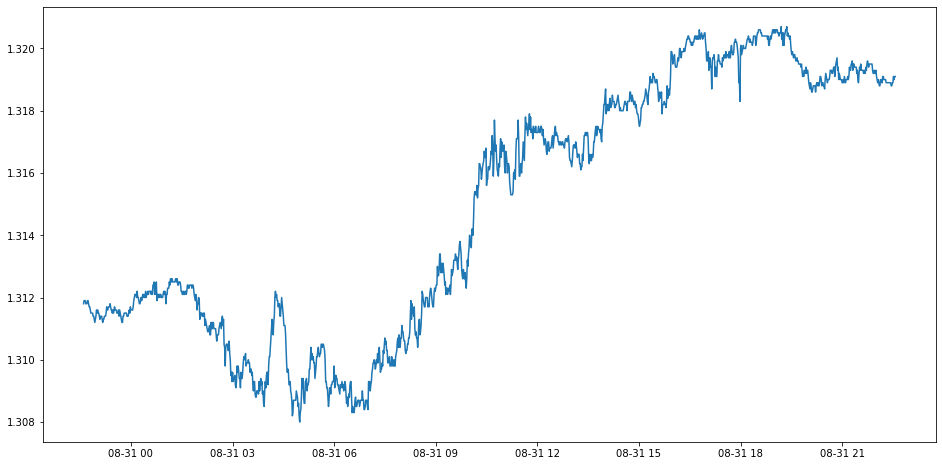

In [521]:
plt.figure(figsize=(16,8))
plt.plot(data['4. close'])

In [522]:
data_1, meta_1 = ts.get_intraday(currency_2, interval='1min', outputsize='full')
print(data_1)

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2022-08-31 22:34:00   1.5244   1.5245  1.5242    1.5244        0.0
2022-08-31 22:33:00   1.5243   1.5244  1.5242    1.5243        0.0
2022-08-31 22:32:00   1.5243   1.5244  1.5241    1.5243        0.0
2022-08-31 22:31:00   1.5242   1.5244  1.5241    1.5243        0.0
2022-08-31 22:30:00   1.5242   1.5244  1.5241    1.5241        0.0
...                      ...      ...     ...       ...        ...
2022-08-30 22:40:00   1.5269   1.5270  1.5267    1.5269        0.0
2022-08-30 22:39:00   1.5270   1.5270  1.5267    1.5269        0.0
2022-08-30 22:38:00   1.5268   1.5270  1.5267    1.5269        0.0
2022-08-30 22:37:00   1.5268   1.5269  1.5266    1.5268        0.0
2022-08-30 22:36:00   1.5268   1.5268  1.5267    1.5268        0.0

[1439 rows x 5 columns]


In [523]:
pair_1 = "EURAUD"
pair_2 = "AUDCAD"
rate_1, meta_2 = ts.get_intraday(pair_1, interval='1min', outputsize='full')
rate_2, meta_3 = ts.get_intraday(pair_2, interval='1min', outputsize='full')

In [524]:
a = rate_1['4. close'] * rate_2['4. close']
spread = a / data['4. close']

In [525]:
mean_spread = spread.mean()
stdev_spread = spread.std()
zscore_spread = (spread - mean_spread) / stdev_spread

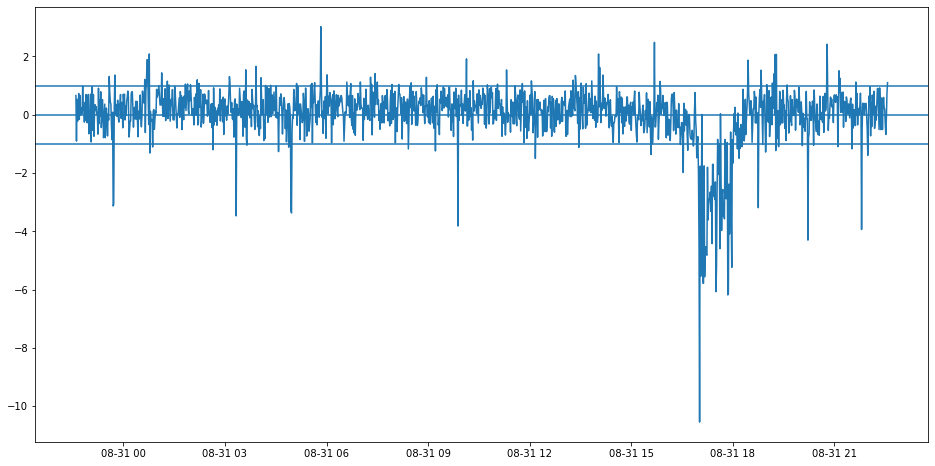

In [526]:
plt.figure(figsize=(16,8))
plt.plot(zscore_spread)
plt.axhline(1)
plt.axhline(0)
plt.axhline(-1)

In [527]:
a[1]

1.31910312

In [528]:
data['4. close'][1]

1.3191

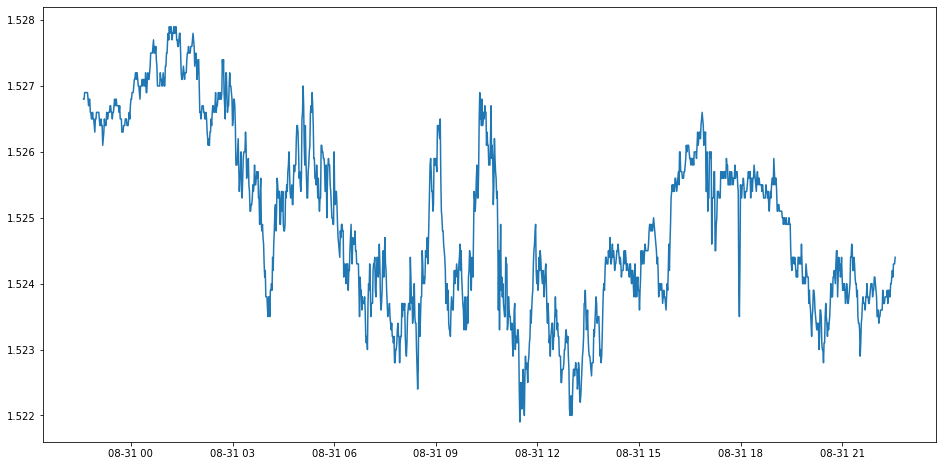

In [529]:
plt.figure(figsize=(16,8))
plt.plot(data_1['4. close'])

In [530]:
mean_1 = data['4. close'].mean()
stdev_1 = data['4. close'].std()
zscore_1 = (data['4. close'] - mean_1) / stdev_1

mean_2 = data_1['4. close'].mean()
stdev_2 = data_1['4. close'].std()
zscore_2 = (data_1['4. close'] - mean_2) / stdev_2

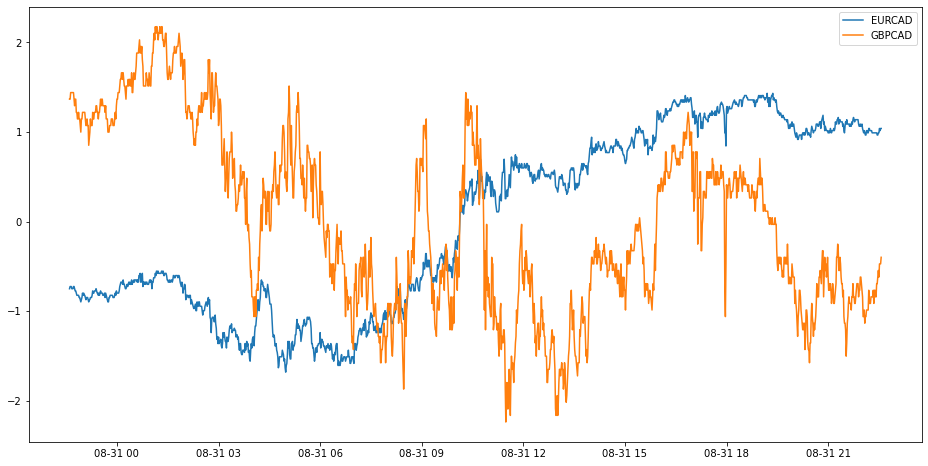

In [531]:
plt.figure(figsize=(16,8))
plt.plot(zscore_1, label=currency_1)
plt.plot(zscore_2, label=currency_2)
plt.legend()

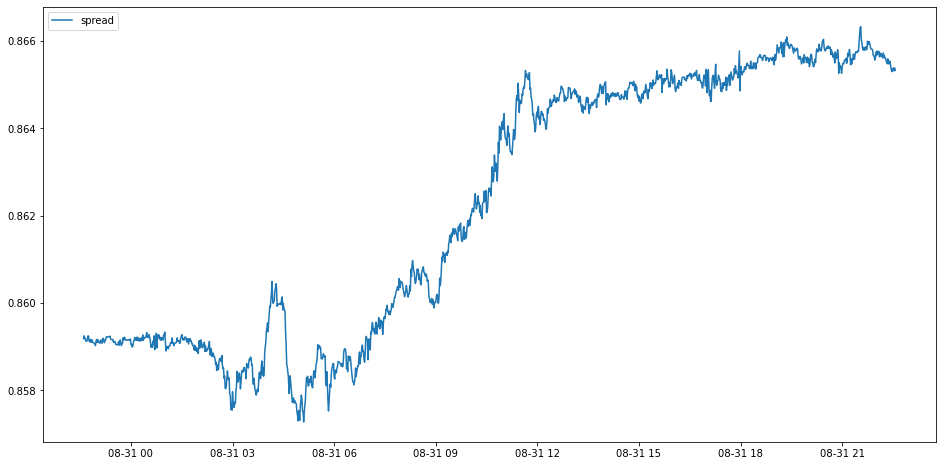

In [532]:
#To figure out if both stocks are cointegrated, calculate the spread between both stocks
spread = data['4. close'] / data_1['4. close']

plt.figure(figsize=(16,8))
plt.plot(spread, label="spread")
plt.legend()

In [533]:
mean = spread.mean()
stdev = spread.std()
zscore = (spread - mean) / stdev

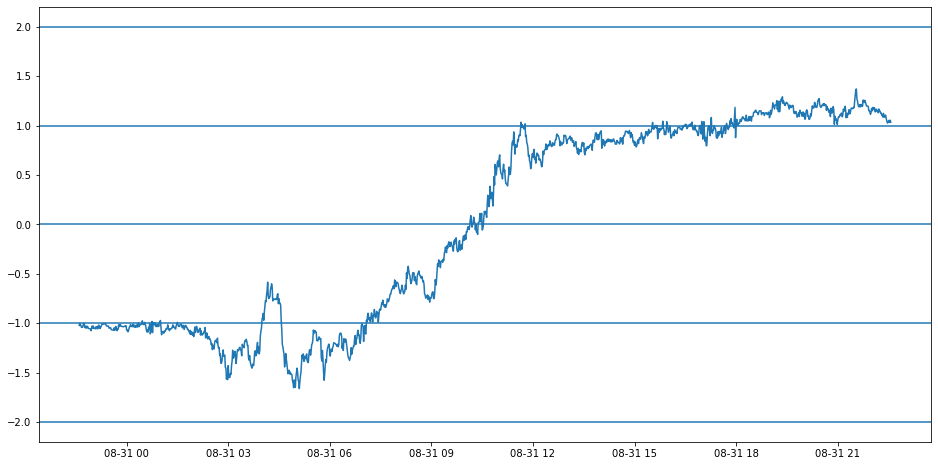

In [534]:
plt.figure(figsize=(16,8))
plt.plot(zscore)
plt.axhline(2)
plt.axhline(1)
plt.axhline(0)
plt.axhline(-1)
plt.axhline(-2)

(array([ 69., 244., 223.,  98.,  48.,  41.,  20.,  69., 384., 243.]),
 array([-1.66197449, -1.35884092, -1.05570734, -0.75257377, -0.4494402 ,
        -0.14630662,  0.15682695,  0.45996052,  0.7630941 ,  1.06622767,
         1.36936124]),
 <BarContainer object of 10 artists>)

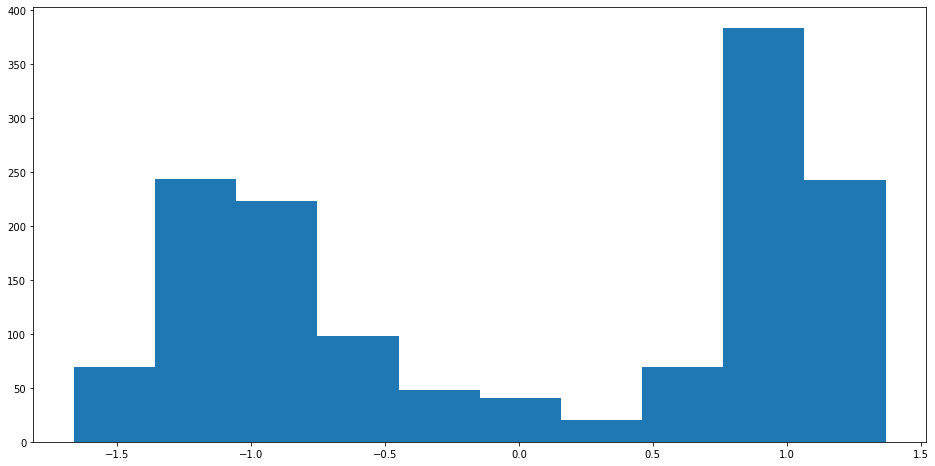

In [535]:
plt.figure(figsize=(16,8))
plt.hist(zscore)

<Figure size 432x288 with 0 Axes>

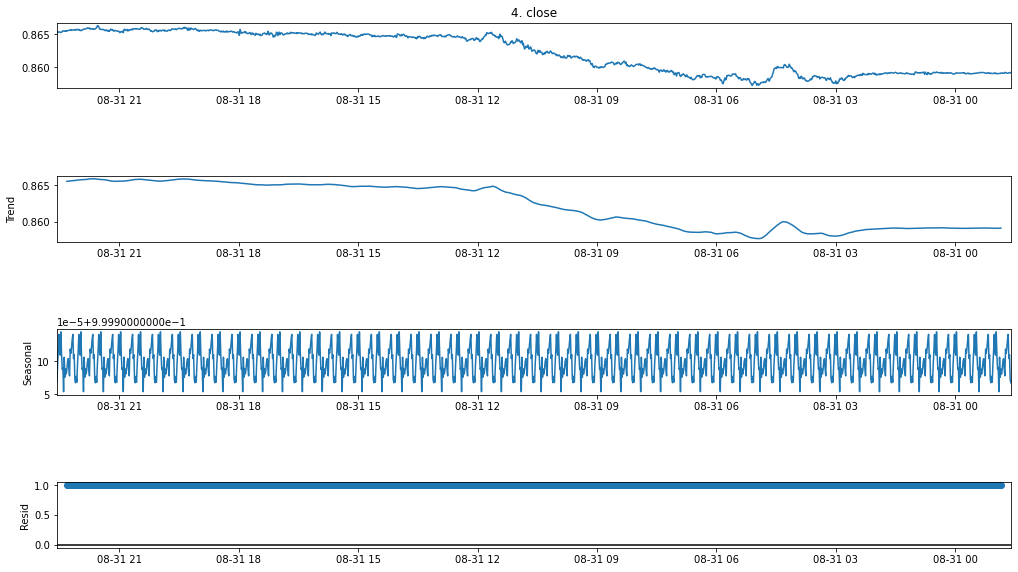

In [536]:
spread.dropna(inplace=True)
result = seasonal_decompose(spread, model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)